In [62]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

In [64]:
train_data.shape,test_data.shape

((2699, 118), (1078, 117))

In [65]:
train_data.head()

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,work_outside_home.4,shop.4,restaurant.4,spent_time.4,large_event.4,public_transit.4,anxious.4,depressed.4,worried_finances.4,tested_positive.4
0,0,0,0,0,0,0,0,0,1,0,...,31.113209,67.394551,36.674291,40.743132,17.842221,4.093712,10.440071,8.627117,37.329512,7.456154
1,1,0,0,0,0,0,1,0,0,0,...,33.920257,64.398380,34.612238,44.035688,17.808103,4.924935,10.172662,9.954333,32.508881,8.010957
2,2,0,0,0,0,0,0,0,0,0,...,31.604604,62.101064,26.521875,36.746453,13.903667,7.313833,10.388712,7.956139,36.745588,2.906977
3,3,0,0,0,0,0,0,0,0,0,...,35.115738,67.935520,38.022492,48.434809,27.134876,3.101904,10.498683,8.231522,38.680162,12.575816
4,4,0,0,0,0,0,0,0,0,0,...,35.129714,69.934592,38.242368,49.095933,22.683709,4.594620,9.878927,9.469290,28.344123,21.428589


数据分为以下四类：
1. 患者所在的州，one-hot向量，个人认为这是比重最大的一方面
2. covid-like-illnesss 像新冠的一些症状
3. 行为，我感觉和这个关系不大，因为我们不知道他去哪了，可以算比重，也可以不算，都可以跑一跑
4. 精神状态，anxious
5. 前几天的新冠测试，我觉得和这个关系也比较大
接下来就是数据说话

In [66]:
train_data['tested_positive.4'].describe()

count    2699.000000
mean        9.819307
std         6.431729
min         0.344828
25%         4.928581
50%         7.670341
75%        13.841567
max        30.304636
Name: tested_positive.4, dtype: float64

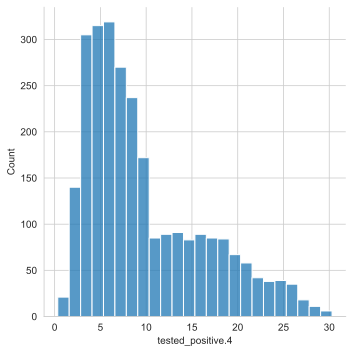

In [67]:
sns.displot(train_data['tested_positive.4'])

In [68]:
quantitative = [feature for feature in train_data.iloc[:,38:] if train_data.dtypes[feature] != 'object']
quantitative.remove('tested_positive.4')

In [69]:
m_cont = pd.melt(train_data,value_vars=quantitative)
#g = sns.FacetGrid(m_cont,col='variable',col_wrap=3,sharex=False,sharey=False,height=4)
#g.map(sns.histplot,'value')

In [70]:
m_cont = pd.melt(train_data,id_vars='tested_positive.4',value_vars = quantitative)
#g = sns.FacetGrid(m_cont,col='variable',col_wrap=3,sharex=False,sharey=True,height=5)
#g.map(plt.scatter,'value','tested_positive.4')

跟我预测的差不多，写一下我想的结果
就是症状，work_outside_home,精神状态，大概就是这几个方面，下面把这几个方面列举出来
然后跑一下模型

In [71]:
list = [feature for feature in train_data.loc[:,'AL':'WA'] if True]
list += [feature for feature in train_data.loc[:,'cli':'hh_cmnty_cli'] if True]
list += [feature for feature in train_data.loc[:,'anxious':'nohh_cmnty_cli.1'] if True]
list += [feature for feature in train_data.loc[:,'anxious.1':'nohh_cmnty_cli.2'] if True]
list += [feature for feature in train_data.loc[:,'anxious.2':'nohh_cmnty_cli.3'] if True]
list += [feature for feature in train_data.loc[:,'anxious.3':'nohh_cmnty_cli.4'] if True]
list.append('anxious.4')
list.append('depressed.4')
list.append('work_outside_home')
for i in range(1,5):
    list.append('work_outside_home.'+str(i))
list.append('tested_positive.4')
list

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'FL',
 'GA',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'NE',
 'NV',
 'NJ',
 'NM',
 'NY',
 'NC',
 'OH',
 'OK',
 'OR',
 'RI',
 'SC',
 'TX',
 'UT',
 'VA',
 'WA',
 'cli',
 'ili',
 'hh_cmnty_cli',
 'anxious',
 'depressed',
 'worried_finances',
 'tested_positive',
 'cli.1',
 'ili.1',
 'hh_cmnty_cli.1',
 'nohh_cmnty_cli.1',
 'anxious.1',
 'depressed.1',
 'worried_finances.1',
 'tested_positive.1',
 'cli.2',
 'ili.2',
 'hh_cmnty_cli.2',
 'nohh_cmnty_cli.2',
 'anxious.2',
 'depressed.2',
 'worried_finances.2',
 'tested_positive.2',
 'cli.3',
 'ili.3',
 'hh_cmnty_cli.3',
 'nohh_cmnty_cli.3',
 'anxious.3',
 'depressed.3',
 'worried_finances.3',
 'tested_positive.3',
 'cli.4',
 'ili.4',
 'hh_cmnty_cli.4',
 'nohh_cmnty_cli.4',
 'anxious.4',
 'depressed.4',
 'work_outside_home',
 'work_outside_home.1',
 'work_outside_home.2',
 'work_outside_home.3',
 'work_outside_home.4',
 'tested_positive.4']

In [72]:
train_data = train_data.loc[:,list]
train_data

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,hh_cmnty_cli.4,nohh_cmnty_cli.4,anxious.4,depressed.4,work_outside_home,work_outside_home.1,work_outside_home.2,work_outside_home.3,work_outside_home.4,tested_positive.4
0,0,0,0,0,0,0,0,1,0,0,...,12.364307,8.151578,10.440071,8.627117,33.069066,32.564654,32.145331,31.330236,31.113209,7.456154
1,0,0,0,0,0,1,0,0,0,0,...,12.894363,8.919288,10.172662,9.954333,36.373964,36.435828,35.851804,34.639961,33.920257,8.010957
2,0,0,0,0,0,0,0,0,0,0,...,8.067909,5.333533,10.388712,7.956139,33.366362,33.012910,32.471093,31.931642,31.604604,2.906977
3,0,0,0,0,0,0,0,0,0,0,...,14.383789,9.416096,10.498683,8.231522,35.458649,36.239612,35.638084,36.292271,35.115738,12.575816
4,0,0,0,0,0,0,0,0,0,1,...,20.257355,15.864201,9.878927,9.469290,34.824775,35.616036,35.821927,35.265587,35.129714,21.428589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,0,0,0,0,0,0,0,0,0,0,...,26.355591,21.616363,14.658436,11.099308,39.679352,39.500541,39.428641,39.622443,39.209278,13.437482
2695,0,0,0,0,0,0,0,0,0,0,...,11.135534,8.133172,13.129031,10.492896,29.468741,28.923377,28.578727,29.117064,28.984491,5.040143
2696,0,0,0,1,0,0,0,0,0,0,...,27.571493,21.874254,16.940896,12.888275,33.162706,33.921600,34.465466,34.069040,34.346100,13.618256
2697,0,0,0,0,0,0,0,0,0,0,...,14.424899,11.189104,12.621144,10.096939,30.758436,30.203132,30.147667,30.163091,30.451071,9.512585


In [73]:
import d2lzh as d2l
from mxnet import autograd,gluon,nd,init
from mxnet.gluon import data as gdata,loss as gloss,nn

In [74]:
all_features = pd.concat((train_data.iloc[:,0:-1],test_data.iloc[:,1:]))
all_features

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,large_event.3,public_transit.3,wearing_mask.4,travel_outside_state.4,shop.4,restaurant.4,spent_time.4,large_event.4,public_transit.4,worried_finances.4
0,0,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,0,0,0,0,0,0,0,0,0,0,...,15.219029,2.321521,63.796014,10.827652,56.016759,23.452736,36.353395,14.897249,2.213512,38.874055
1074,0,0,0,0,0,0,0,0,0,0,...,17.031913,3.187571,67.598365,7.752599,56.187953,27.997754,33.804429,17.195828,3.047023,43.981094
1075,0,0,0,0,0,0,0,0,0,0,...,18.570184,3.157126,50.272653,14.479596,56.259350,28.478845,40.761905,19.391323,3.207936,32.564643
1076,0,0,0,0,0,0,0,0,0,0,...,16.439121,2.824369,68.633036,6.281439,55.748700,28.047581,33.126379,16.473647,2.965817,43.862177


In [75]:
n_train = train_data.shape[0]
train_features = nd.array(all_features[:n_train].values)
test_features = nd.array(all_features[n_train:].values)
train_labels = nd.array(train_data['tested_positive.4'].values).reshape((-1,1))
train_features.shape,test_features.shape,train_labels.shape

((2699, 116), (1078, 116), (2699, 1))

In [76]:
loss = gloss.L2Loss()

def get_net():
    net = nn.Sequential()
    net.add(nn.Dense(300,activation='relu'),nn.Dense(1))
    net.initialize()
    return net

def log_rmse(net,features,labels):
    return loss(net(features),labels).mean().asscalar()


In [77]:
def train(net,train_features,train_labels,test_features,test_lables,num_epochs,learning_rate,weight_decay,batch_size):
    train_ls,test_ls = [],[]
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features,train_labels),batch_size,shuffle=True)
    trainer = gluon.Trainer(net.collect_params(),'adam',{'learning_rate':learning_rate,'wd':weight_decay})
    for epoch in range(num_epochs):
        for X,y in train_iter:
            with autograd.record():
                l = loss(net(X),y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(log_rmse(net,train_features,train_labels))
        if test_lables is not None:
            test_ls.append(log_rmse(net,test_features,test_lables))
    return train_ls,test_ls

In [78]:
def get_k_fold_data(k,i,X,y):
    assert k>1
    fold_size = X.shape[0] // k
    X_train ,y_train = None,None
    for j in range(k):
        idx = slice(j*fold_size,(j+1)*fold_size)
        X_part,y_part = X[idx,:],y[idx]
        if j==i:
            X_valid,y_valid = X_part,y_part
        elif X_train is None:
            X_train ,y_train = X_part,y_part
        else:
            X_train = nd.concat(X_train,X_part,dim = 0)
            y_train = nd.concat(y_train,y_part,dim=0)
    return X_train,y_train,X_valid,y_valid

In [79]:
def k_fold(k,X_train,y_train,num_epochs,learning_rate,weight_decay,batch_size):
    train_l_sum,valid_l_sum = 0,0
    for i in range(k):
        data = get_k_fold_data(k,i,X_train,y_train)
        net = get_net()
        a,b,c,d = data
        train_ls,valid_ls = train(net,*data,num_epochs,learning_rate,weight_decay,batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        d2l.semilogy(range(1,num_epochs+1),train_ls,'epochs','rmse',range(1,num_epochs+1),valid_ls,['train','valid'])
        print('fold % d ,train rmse %f,valid rmse %f' % (i,train_ls[-1],valid_ls[-1]))
    return train_l_sum/k,valid_l_sum/k

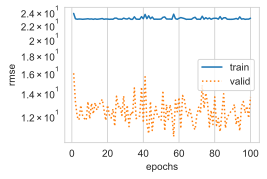

fold  0 ,train rmse 23.070236,valid rmse 13.658530


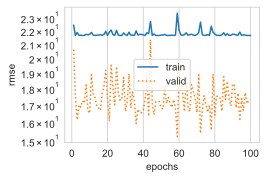

fold  1 ,train rmse 21.654757,valid rmse 17.319492


In [ ]:
k,num_epochs,lr,weight_decay,batch_size = 5,100,1,0,80
train_l,valid_l = k_fold(k,train_features,train_labels,num_epochs,lr,weight_decay,batch_size)
print('%d-fold validation: avg train rmse %f,avg valid rmse %f' % (k,train_l,valid_l))